In [1]:
#setup
from mlwpy import *
%matplotlib inline

diabetes = datasets.load_diabetes()

d_tts = skms.train_test_split(diabetes.data,
                              diabetes.target, 
                              test_size=.25,
                              random_state=42)

(diabetes_train_ftrs, diabetes_test_ftrs, 
 diabetes_train_tgt,  diabetes_test_tgt) = d_tts

In [2]:
weights = np.array([3.5, -2.1, .7])
print(np.sum(np.abs(weights)),
      np.sum(weights**2))

6.3 17.15


In [3]:
x_1 = np.arange(10)
m, b = 3, 2
w = np.array([m,b])

x = np.c_[x_1, np.repeat(1.0, 10)] # the plus-one trick

errors = np.tile(np.array([0.0, 1.0, 1.0, .5, .5]), 2)

print(errors * errors)
print(np.dot(errors, errors))

y_true = rdot(w,x)
y_msr  = y_true + errors

D = (x,y_msr)

[0.   1.   1.   0.25 0.25 0.   1.   1.   0.25 0.25]
5.0


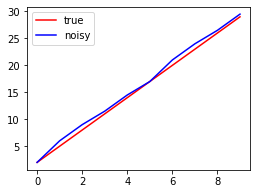

In [4]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(x_1, y_true, 'r', label='true')
ax.plot(x_1, y_msr , 'b', label='noisy')
ax.legend();

In [5]:
def sq_diff(a,b):
    return (a-b)**2

In [6]:
predictions = rdot(w,x)
np.sum(sq_diff(predictions, y_msr))

5.0

In [7]:
predictions = rdot(w,x)

loss = np.sum(sq_diff(predictions, y_msr))

complexity_1 = np.sum(np.abs(weights))
complexity_2 = np.sum(weights**2) # == np.dot(weights, weights)

cost_1 = loss + complexity_1
cost_2 = loss + complexity_2

print("Sum(abs) complexity:", cost_1)
print("Sum(sqr) complexity:", cost_2)

Sum(abs) complexity: 11.3
Sum(sqr) complexity: 22.15


In [8]:
predictions = rdot(w,x)
errors = np.sum(sq_diff(predictions, y_msr))
complexity_1 = np.sum(np.abs(weights))

C = .5
cost = errors + C * complexity_1
cost

8.15

In [9]:
models = [linear_model.Lasso(),            # L1 regularized; C=1.0
          linear_model.Ridge()]            # L2 regularized; C=1.0

for model in models:
    model.fit(diabetes_train_ftrs, diabetes_train_tgt)
    train_preds = model.predict(diabetes_train_ftrs)
    test_preds  = model.predict(diabetes_test_ftrs)
    print(get_model_name(model), 
          "\nTrain MSE:",metrics.mean_squared_error(diabetes_train_tgt, 
                                                    train_preds), 
          "\n Test MSE:", metrics.mean_squared_error(diabetes_test_tgt,  
                                                     test_preds))

Lasso 
Train MSE: 3947.899897977698 
 Test MSE: 3433.1524588051197
Ridge 
Train MSE: 3461.739515097773 
 Test MSE: 3105.468750907886


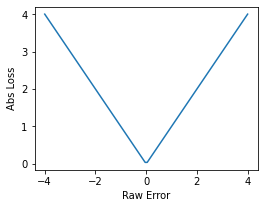

In [10]:
#  here, we don't ignore small errors
error = np.linspace(-4, 4, 100)
loss = np.abs(error)

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(error, loss)

ax.set_xlabel('Raw Error')
ax.set_ylabel('Abs Loss');

In [11]:
an_error = .75
abs_error = abs(an_error)
if abs_error < 1.0:
    the_loss = 0.0
else:
    the_loss = abs_error
print(the_loss)

0.0


In [12]:
an_error = 0.75
adj_error = abs(an_error) - 1.0
if adj_error < 0.0:
    the_loss = 0.0
else:
    the_loss = adj_error
print(the_loss)

0.0


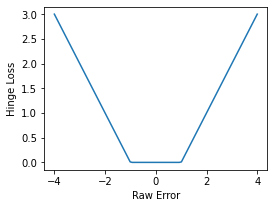

In [13]:
error = np.linspace(-4, 4, 100)

# here, we ignore errors up to 1.0 ... take bigger value
loss = np.maximum(np.abs(error) - 1.0, 
                  np.zeros_like(error))

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(error, loss)

ax.set_xlabel("Raw Error")
ax.set_ylabel("Hinge Loss");

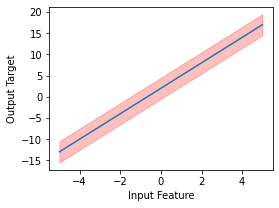

In [14]:
threshold = 2.5

xs = np.linspace(-5,5,100)
ys_true = 3 * xs + 2

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(xs, ys_true)
ax.fill_between(xs, ys_true-threshold, ys_true+threshold, 
                 color=(1.0,0,0,.25))

ax.set_xlabel('Input Feature')
ax.set_ylabel('Output Target');

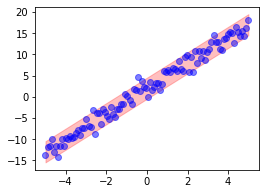

In [15]:
threshold = 2.5

xs = np.linspace(-5,5,100)
ys = 3 * xs + 2 + np.random.normal(0, 1.5, 100)

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(xs, ys, 'o',  color=(0,0,1.0,.5))
ax.fill_between(xs, ys_true - threshold, ys_true + threshold, 
                 color=(1.0,0,0,.25));

In [16]:
# hyper-parameters for the scenario
C, epsilon = 1.0, .25

# parameters
weights = np.array([1.3])

In [17]:
# prediction, error, loss
predictions = rdot(weights, xs.reshape(-1, 1))
errors = ys - predictions

loss_sse   = np.sum(errors ** 2)
loss_sae   = np.sum(np.abs(errors))
loss_hinge = np.sum(np.max(np.abs(errors) - epsilon, 0))

In [18]:
# complexity penalty for regularization
complexity_saw = np.sum(np.abs(weights))
complexity_ssw = np.sum(weights**2)

In [19]:
# cost
cost_gof_regression   = loss_sse   + 0.0
cost_L1pen_regression = loss_sse   + C * complexity_saw
cost_L2pen_regression = loss_sse   + C * complexity_ssw
cost_sv_regression    = loss_hinge + C * complexity_ssw

In [20]:
svrs = [svm.SVR(gamma='auto'),   # default epsilon=0.1 
        svm.NuSVR(gamma='auto')] # default nu=0.5

for model in svrs:
    preds = (model.fit(diabetes_train_ftrs, diabetes_train_tgt)
                  .predict(diabetes_test_ftrs))
    print(metrics.mean_squared_error(diabetes_test_tgt, preds))

5516.346206774444
5527.520141195904


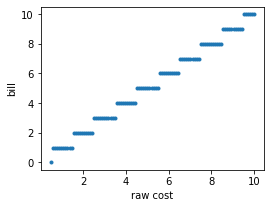

In [21]:
raw_bill = np.linspace(.5, 10.0, 100)
collected = np.round(raw_bill)

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(raw_bill, collected, '.')
ax.set_xlabel("raw cost")
ax.set_ylabel("bill");

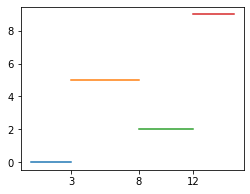

In [22]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot([0,3],   [0,0],
        [3,8],   [5,5],
        [8,12],  [2,2],
        [12,15], [9,9])
ax.set_xticks([3,8,12]);

In [23]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import (check_X_y, 
                                      check_array, 
                                      check_is_fitted)

class PiecewiseConstantRegression(BaseEstimator, RegressorMixin):
    def __init__(self, cut_points=None):
        self.cut_points = cut_points

    def fit(self, X, y):
        X, y = check_X_y(X,y)
        assert X.shape[1] == 1 # one variable only
        
        if self.cut_points is None:
            n = (len(X) // 10) + 1
            qtiles = np.linspace(0.0, 1.0, n+2)[1:-1]
            self.cut_points =  np.percentile(X, qtiles, axis=1)
        else:
            # ensure cutpoints in-order and in range of X
            assert np.all(self.cut_points[:-1] < self.cut_points[1:])
            assert (X.min() < self.cut_points[0] and 
                    self.cut_points[-1] < X.max())

        recoded_X = self._recode(X)
        # even though the _inner_ model is fit without an intercept
        # our piecewise model *does* have an constant term (but see notes)
        self.coeffs_ = (linear_model.LinearRegression(fit_intercept=False)
                                    .fit(recoded_X, y).coef_)
    def _recode(self, X):
        cp = self.cut_points
        n_pieces = len(cp) + 1
        recoded_X = np.eye(n_pieces)[np.searchsorted(cp, X.flat)]
        return recoded_X
    
    def predict(self, X):
        check_is_fitted(self, 'coeffs_')
        X = check_array(X) 
        recoded_X = self._recode(X)
        return rdot(self.coeffs_, recoded_X)

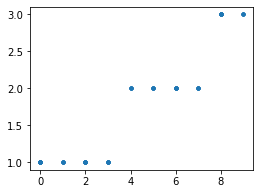

In [24]:
ftr = np.random.randint(0,10,(100,1)).astype(np.float64)
cp = np.array([3,7])
tgt = np.searchsorted(cp, ftr.flat) + 1

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(ftr, tgt, '.');

In [25]:
# here, we're giving our self all the help we can by using
# the same cut points as our data were generated with
model = PiecewiseConstantRegression(cut_points=np.array([3, 7]))
model.fit(ftr, tgt)
preds = model.predict(ftr)
print("Predictions equal target?", np.allclose(preds, tgt))

Predictions equal target? True


In [26]:
dtrees = [tree.DecisionTreeRegressor(max_depth=md) for md in [1, 3, 5, 10]]

for model in dtrees:
    preds = (model.fit(diabetes_train_ftrs, diabetes_train_tgt)
                  .predict(diabetes_test_ftrs))
    mse = metrics.mean_squared_error(diabetes_test_tgt, preds)
    fmt = "{} {:2d} {:4.0f}"
    print(fmt.format(get_model_name(model),
                     model.get_params()['max_depth'],
                     mse))

DecisionTreeRegressor  1 4341
DecisionTreeRegressor  3 3593
DecisionTreeRegressor  5 4312
DecisionTreeRegressor 10 5190


In [27]:
student_df = pd.read_csv('data/portugese_student_numeric.csv')
student_ftrs = student_df[student_df.columns[:-1]]
student_tgt  = student_df['G3']

In [28]:
student_tts = skms.train_test_split(student_ftrs, student_tgt)

(student_train_ftrs, student_test_ftrs,
 student_train_tgt,  student_test_tgt) = student_tts

In [29]:
old_school = [linear_model.LinearRegression(),
              neighbors.KNeighborsRegressor(n_neighbors=3),
              neighbors.KNeighborsRegressor(n_neighbors=10)]

In [30]:
# L1, L2 penalized (abs, sqr) C=1.0 for both
penalized_lr = [linear_model.Lasso(), 
                linear_model.Ridge()]

# defaults are epsilon=.1 and nu=.5, respectively
svrs = [svm.SVR(), svm.NuSVR()] 

dtrees = [tree.DecisionTreeRegressor(max_depth=md) for md in [1, 3, 5, 10]]

reg_models = old_school + penalized_lr + svrs + dtrees

In [31]:
def rms_error(actual, predicted):
    ' root-mean-squared-error function '
    # lesser values are better (a<b ... a better)
    mse = metrics.mean_squared_error(actual, predicted)    
    return np.sqrt(mse)
rms_scorer = metrics.make_scorer(rms_error)

In [32]:
scaler = skpre.StandardScaler()

scores = {}
for model in reg_models:
    pipe = pipeline.make_pipeline(scaler, model)
    preds = skms.cross_val_predict(pipe, 
                                   student_ftrs, student_tgt, 
                                   cv=10)
    key = (get_model_name(model) + 
           str(model.get_params().get('max_depth', "")) + 
           str(model.get_params().get('n_neighbors', "")))
    scores[key] = rms_error(student_tgt, preds)

df = pd.DataFrame.from_dict(scores, orient='index').sort_values(0)
df.columns=['RMSE']
display(df)

,RMSE
DecisionTreeRegressor1,4.3192
Ridge,4.3646
LinearRegression,4.3653
NuSVR,4.3896
SVR,4.4062
DecisionTreeRegressor3,4.4298
Lasso,4.4375
KNeighborsRegressor10,4.4869
DecisionTreeRegressor5,4.7410
KNeighborsRegressor3,4.8915


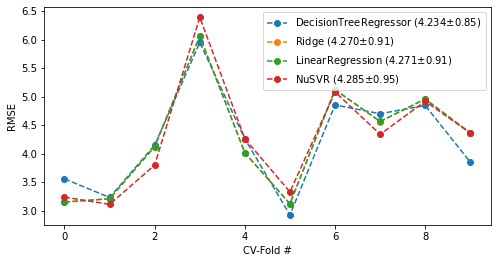

In [33]:
better_models = [tree.DecisionTreeRegressor(max_depth=1),
                 linear_model.Ridge(),
                 linear_model.LinearRegression(),
                 svm.NuSVR()]

fig, ax = plt.subplots(1, 1, figsize=(8,4))
for model in better_models:
    pipe = pipeline.make_pipeline(scaler, model)    
    cv_results = skms.cross_val_score(pipe, 
                                      student_ftrs, student_tgt, 
                                      scoring = rms_scorer, 
                                      cv=10)

    my_lbl = "{:s} ({:5.3f}$\pm${:.2f})".format(get_model_name(model), 
                                                cv_results.mean(), 
                                                cv_results.std())
    ax.plot(cv_results, 'o--', label=my_lbl)
    ax.set_xlabel('CV-Fold #')
    ax.set_ylabel("RMSE")
    ax.legend()